## Datasets

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import sys
import urllib.request
import seaborn as sns

C:\Users\Preeti\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# ******* ************************** ************** ********** ************ ******************#
# Walk, Transit, Bike scores dataset
# ******* ************************** ************** ********** ************ ******************#

Walk Score is a private company that provides walkability services and apartment search tools through a website and mobile applications. Its flagship product is a large-scale, public access walkability index that assigns a numerical walkability score to any address in the United States, Canada, and Australia.

The Walk Score methodology was developed with the Walk Score advisory board and has been validated by leading academic researchers.

Walk Score

Walk Score  measures walkability on a scale from 0 - 100 based on walking routes to destinations such as grocery stores, schools, parks, restaurants, and retail. For each address, Walk Score analyzes hundreds of walking routes to nearby amenities. Points are awarded based on the distance to amenities in each category. Amenities within a 5 minute walk (.25 miles) are given maximum points. A decay function is used to give points to more distant amenities, with no points given after a 30 minute walk. Walk Score also measures pedestrian friendliness by analyzing population density and road metrics such as block length and intersection density. Data sources include Google, Education.com, Open Street Map, the U.S. Census, Localeze, and places added by the Walk Score user community.

Walk Score Point Grid

To rank cities and neighborhoods, we calculate the Walk Score of approximately every city block (technically a grid of latitude and longitude points spaced roughly 500 feet apart).

Each point is weighted by population density so that the rankings reflect where people live and so that neighborhoods and cities do not have lower scores because of parks, bodies of water, etc.

For our Walk Score ranking, we define "large cities" as the 50 largest U.S. cities. For our Transit Score and Bike Score ranking, we define "large cities" as cities with more than 500,000 people.

Walk Score results:

90–100	Walker’s Paradise. Daily errands do not require a car<br>
70–89	Very Walkable. Most errands can be accomplished on foot<br>
50–69	Somewhat Walkable. Some errands can be accomplished on foot<br>
25–49	Car-Dependent. Most errands require a car<br>
0–24	Car-Dependent Almost all errands require a car<br>




Walkability, Real Estate, and Public Health Data

Walk Score data is used by analysts and researchers in the fields of real estate, urban planning, government, public health, and finance.

Walk Score has received grants from the Rockefeller Foundation and the Robert Wood Johnson Foundation to align our algorithms with the latest academic research.

Walk Score data is available in a variety of formats including shapefiles, spreadsheets, and via our APIs. We can provide Walk Score data for individual addresses or larger geographic areas like postal codes. Walk Score data is available in the United States, Canada, Australia, and New Zealand. Walk Score and Transit Score are patented systems, multiple other patents are pending.

 

Transit Score

 Transit Score is a patented measure of how well a location is served by public transit. Transit Score is based on data released in a standard format by public transit agencies.

To calculate a Transit Score, we assign a "usefulness" value to nearby transit routes based on the frequency, type of route (rail, bus, etc.), and distance to the nearest stop on the route. The "usefulness" of all nearby routes is summed and normalized to a score between 0 - 100.


Transit Score<br>

90–100	Rider’s Paradise.World-class public transportation.<br>
70–89	Excellent Transit.Transit is convenient for most trips.<br>
50–69	Good Transit.Many nearby public transportation options.<br>
25–49	Some Transit.A few nearby public transportation options.<br>
0–24	Minimal Transit.It is possible to get on a bus.<br>
 
 
Bike Score

 Bike Score measures whether an area is good for biking. For a given location, a Bike Score is calculated by measuring bike infrastructure (lanes, trails, etc.), hills, destinations and road connectivity, and the number of bike commuters. These component scores are based on data from the USGS, Open Street Map, and the U.S. Census.

With our subscription services, Walk Score data can be tracked over time to measure historical trends. For example, the percentage of residents in a city who can walk to fresh food in 5 minutes.

 
Bike Score:<br>

90–100	Biker’s Paradise. Daily errands can be accomplished on a bike.<br>
70–89	Very Bikeable.Biking is convenient for most trips.<br>
50–69	Bikeable.Some bike infrastructure.<br>
0–49	Somewhat Bikeable. Minimal bike infrastructure.<br>

 

How Much is a Point of Walk Score Worth?

In U.S. cities, homes within walking distance to jobs, schools, shopping, parks and other urban amenities are both highly desired and extremely rare. Fewer than 2 percent of  active listings are considered a walker’s paradise (Walk Score of 90 and above). Yet 56 percent of millennials and 46 percent of boomers prefer walkable communities with a range of housing amidst local businesses and public services. And like everything rare and desirable, walkability comes at a premium; homes highly “walkable” to amenities, everything else being equal, are more expensive than comparable homes in less “walkable” areas.

To estimate how much walkability is worth when buying or selling a home, we looked at the sale prices and Walk Score ratings of more than one million homes sold between January 2014 and April 2016 across 14 major metro areas to determine the average price of one Walk Score point.

We found that one Walk Score point can increase the price of a home by an average of  $3,250 or 0.9 percent.


Additional info needed
1. Neighbourhood
2. 

In [29]:
#master.to_csv('../data/WalkScoreMasterFileByStreet.csv', index=False)
master = pd.read_csv('../data/WalkScoreMasterFileByStreet.csv')


In [18]:
master['BikeScore'] = master['BikeScore'].fillna(0)
master['BikeScoreDesc'] = master['BikeScoreDesc'].fillna('Data Not Available')
master['TransitScore'] = master['TransitScore'].fillna(0)
master['TransitScoreDesc'] = master['TransitScoreDesc'].fillna('Data Not Available')

In [19]:
master.head()

,ID,street,city,state,zipCode,lat,long,WalkScore,WalkScoreDesc,BikeScore,BikeScoreDesc,TransitScore,TransitScoreDesc
0,1,MAIN ST,ADDYSTON,OH,45001,39.138995,-84.714726,5,Car-Dependent,0.0,Data Not Available,0.0,Data Not Available
1,2,CHURCH ST,ADDYSTON,OH,45001,39.140958,-84.711156,2,Car-Dependent,0.0,Data Not Available,0.0,Data Not Available
2,3,MAIN ST,ERLANGER,OH,41018,39.136806,-84.708632,6,Car-Dependent,0.0,Data Not Available,0.0,Data Not Available
3,4,1ST ST,ADDYSTON,OH,45001,39.138351,-84.709616,6,Car-Dependent,0.0,Data Not Available,0.0,Data Not Available
4,5,SEKITAN AVE,ADDYSTON,OH,45001,39.139014,-84.713010,3,Car-Dependent,0.0,Data Not Available,0.0,Data Not Available


In [20]:
WalkScoreDesc = master.groupby(['WalkScoreDesc']).count()
WalkScoreDesc.reset_index()
WalkScoreDesc['WalkScoreDesc'] = WalkScoreDesc.index

In [21]:
WalkScoreDesc

,ID,street,city,state,zipCode,lat,long,WalkScore,BikeScore,BikeScoreDesc,TransitScore,TransitScoreDesc,WalkScoreDesc
WalkScoreDesc,,,,,,,,,,,,,
Car-Dependent,5781,5781,5781,5781,5781,5781,5781,5781,5781,5781,5781,5781,Car-Dependent
Somewhat Walkable,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438,Somewhat Walkable
Very Walkable,636,636,636,636,636,636,636,636,636,636,636,636,Very Walkable
Walker's Paradise,137,137,137,137,137,137,137,137,137,137,137,137,Walker's Paradise


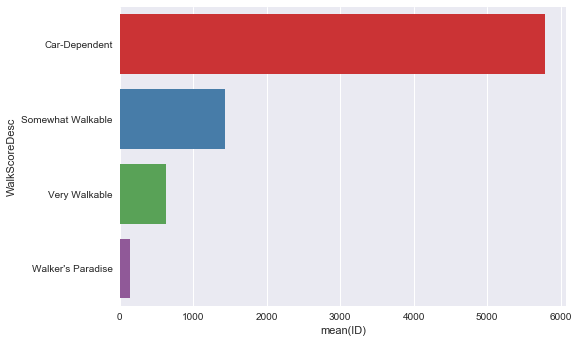

In [22]:
sns.barplot(y="WalkScoreDesc", x="ID", data=WalkScoreDesc,palette="Set1")

In [23]:
TransitScoreDesc = master.groupby(['TransitScoreDesc']).count()
TransitScoreDesc.reset_index()
TransitScoreDesc['TransitScoreDesc'] = TransitScoreDesc.index

In [24]:
TransitScoreDesc

,ID,street,city,state,zipCode,lat,long,WalkScore,WalkScoreDesc,BikeScore,BikeScoreDesc,TransitScore,TransitScoreDesc
TransitScoreDesc,,,,,,,,,,,,,
Data Not Available,7118,7118,7118,7118,7118,7118,7118,7118,7118,7118,7118,7118,Data Not Available
Excellent Transit,30,30,30,30,30,30,30,30,30,30,30,30,Excellent Transit
Good Transit,161,161,161,161,161,161,161,161,161,161,161,161,Good Transit
Minimal Transit,19,19,19,19,19,19,19,19,19,19,19,19,Minimal Transit
Some Transit,664,664,664,664,664,664,664,664,664,664,664,664,Some Transit


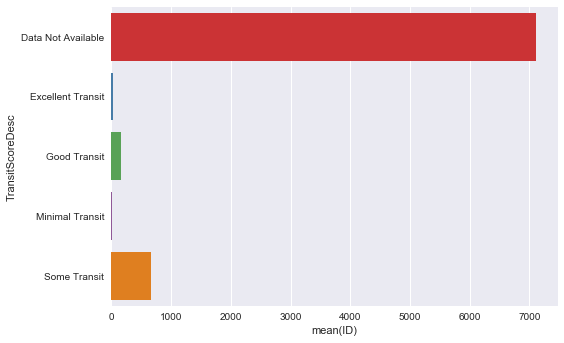

In [25]:
sns.barplot(y="TransitScoreDesc", x="ID", data=TransitScoreDesc,palette="Set1")

In [26]:
BikeScoreDesc = master.groupby(['BikeScoreDesc']).count()
BikeScoreDesc.reset_index()
BikeScoreDesc['BikeScoreDesc'] = BikeScoreDesc.index

In [27]:
BikeScoreDesc

,ID,street,city,state,zipCode,lat,long,WalkScore,WalkScoreDesc,BikeScore,TransitScore,TransitScoreDesc,BikeScoreDesc
BikeScoreDesc,,,,,,,,,,,,,
Bikeable,491,491,491,491,491,491,491,491,491,491,491,491,Bikeable
Data Not Available,4823,4823,4823,4823,4823,4823,4823,4823,4823,4823,4823,4823,Data Not Available
Somewhat Bikeable,2675,2675,2675,2675,2675,2675,2675,2675,2675,2675,2675,2675,Somewhat Bikeable
Very Bikeable,3,3,3,3,3,3,3,3,3,3,3,3,Very Bikeable


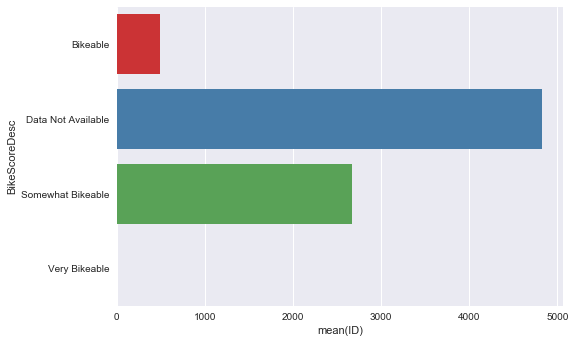

In [28]:
sns.barplot(y="BikeScoreDesc", x="ID", data=BikeScoreDesc,palette="Set1")

<br>
<br>
<br>

# ******* *********** ********** ***** ************** ********** ******** **** ******* ** *********#
# Police calls for service
# ******* ************************** ************** ********** ************ ******************#

<br>
<br>
<br>

In [3]:
PDI_PoliceData = pd.read_csv('../data/PDI__Police_Data_Initiative__Police_Calls_for_Service.csv')

In [15]:
grid_data = pd.read_csv('../data/grid_centroids_250m.csv')

In [4]:
PDI_PoliceData.shape

(2307287, 18)

In [5]:
PDI_PoliceData.head()

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,PRIORITY,PRIORITY_COLOR,ARRIVAL_TIME_PRIMARY_UNIT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD,DISTRICT
0,CARPLIN PL/HARVEY AV,NaN,NaN,CP,08/04/2016 08:03:52 AM,NTR - NOTHING TO REPORT,LCP160804000344,SDET,NaN,NaN,NaN,NaN,08/04/2016 08:06:35 AM,08/04/2016 11:47:30 AM,08/04/2016 08:03:58 AM,P433,NaN,NaN
1,30XX PAUL ST,39.135268,-84.460497,CP,08/11/2015 12:26:08 PM,SOW - SENT ON WAY,LCP150811000688,ASSLT,NaN,NaN,NaN,NaN,08/11/2015 12:45:44 PM,08/11/2015 01:03:40 PM,08/11/2015 12:42:43 PM,P212,HYDE PARK,2.0
2,63XX MEIS AV,39.205450,-84.553568,CP,03/23/2015 10:48:58 AM,CAN - CANCEL,LCP150323000479,SUSP,NaN,NaN,NaN,NaN,03/23/2015 10:48:58 AM,03/23/2015 10:51:33 AM,03/23/2015 10:48:58 AM,P543,COLLEGE HILL,5.0
3,32XX BOWLING GREEN CT,39.142982,-84.554560,CP,10/31/2014 10:52:18 AM,TOW - TOW REPORT,LCP141031000526,REPO,NaN,NaN,NaN,NaN,NaN,10/31/2014 11:01:50 AM,NaN,P352,MILLVALE,3.0
4,41XX PRESIDENT DR,39.158312,-84.559389,CP,01/31/2016 10:55:43 AM,ASSIST,LCP160131000442,WEAPON,PERSON W/ WEAPON (OT,NaN,2.0,NaN,01/31/2016 11:00:05 AM,01/31/2016 03:59:43 PM,01/31/2016 10:57:54 AM,P353,VILLAGES AT ROLL HILL,3.0


### Police incidents types are huge list. We are looking for accident related. Hence we short list the dataset to include only the incidents we want

In [6]:
PDI_PoliceData['INCIDENT_TYPE_DESC']

0                                        NaN
1                                        NaN
2                                        NaN
3                                        NaN
4                       PERSON W/ WEAPON (OT
5                        RESIDENTIAL BURGLAR
6                                        NaN
7               HAZARD TO TRAFFIC/PEDESTRIAN
8                                        NaN
9                          PARKING VIOLATION
10                                       NaN
11                                       NaN
12                                       NaN
13                                       NaN
14                                       NaN
15                      CELL DISCON OR SICAL
16                                       NaN
17                                       NaN
18                      CELL DISCON OR SICAL
19                            MISSING PERSON
20                                       NaN
21                    GENERAL INFO BROADCAST
22        

## We are filtering to only these incidents

In [7]:
PDI_PoliceData1 = PDI_PoliceData[PDI_PoliceData['INCIDENT_TYPE_DESC'].isin (['ACCIDENT NO INJURIES',
                                                            'ACCIDENT WITH INJURIES',
                                                            'ACCIDENT-VEH INTO BLDG',
                                                            'AUTO ACCIDENT - NO I',
                                                            'AUTO ACCIDENT INJURI',
                                                            'AUTO ACCIDENT NO INJ',
                                                            'TRAFFIC ACCIDENT W/ENTRAPMENT',
                                                            'TRAFFIC HAZARD',
                                                            'TRAFFIC POST',
                                                            'TRAFFIC PURSUIT',
                                                            'TRAFFIC STOP',
                                                            'TRAFFIC TIE UP'
                                                            ]) ]

In [11]:
PDI_PoliceData1.dropna(subset=['LATITUDE_X', 'LONGITUDE_X'], inplace=True)

C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
PDI_PoliceData1[PDI_PoliceData1['LATITUDE_X'].isnull()]

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,PRIORITY,PRIORITY_COLOR,ARRIVAL_TIME_PRIMARY_UNIT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD,DISTRICT


In [13]:
PDI_PoliceData1.to_csv('../data/PDI_PoliceData.csv', index=False)

In [17]:
grid_data
PDI_PoliceData1[['LATITUDE_X']]

,LATITUDE_X
29,39.112482
37,39.159134
61,39.147677
66,39.175789
105,39.200264
117,39.126808
121,39.113144
144,39.117571
228,39.103163
246,39.149899


In [37]:
INCIDENT_TYPE_DESC = PDI_PoliceData1.groupby(['INCIDENT_TYPE_DESC']).count()
INCIDENT_TYPE_DESC.reset_index()
INCIDENT_TYPE_DESC['INCIDENT_TYPE_DESC'] = INCIDENT_TYPE_DESC.index

INCIDENT_TYPE_DESC

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,NEIGHBORHOOD,PRIORITY,PRIORITY_COLOR,ARRIVAL_TIME_PRIMARY_UNIT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD,DISTRICT,INCIDENT_TYPE_DESC
INCIDENT_TYPE_DESC,,,,,,,,,,,,,,,,,,
ACCIDENT NO INJURIES,29300,29288,29288,29301,29301,28844,29301,29301,0,29301,29301,22184,28722,24447,29089,28857,28853,ACCIDENT NO INJURIES
ACCIDENT WITH INJURIES,849,849,849,849,849,832,849,849,0,849,849,738,811,776,846,839,837,ACCIDENT WITH INJURIES
ACCIDENT-VEH INTO BLDG,67,67,67,67,67,62,67,67,0,67,67,58,59,59,67,67,67,ACCIDENT-VEH INTO BLDG
AUTO ACCIDENT - NO I,22275,6191,6191,22275,22275,22230,22275,22275,0,22275,0,17861,22226,19834,22033,6141,6141,AUTO ACCIDENT - NO I
AUTO ACCIDENT INJURI,3319,836,836,3319,3319,3308,3319,3319,0,3319,0,2841,3302,2941,3304,821,821,AUTO ACCIDENT INJURI
AUTO ACCIDENT NO INJ,1,0,0,1,1,1,1,1,0,1,0,0,1,0,1,0,0,AUTO ACCIDENT NO INJ
TRAFFIC ACCIDENT W/ENTRAPMENT,81,81,81,81,81,79,81,81,0,81,81,66,78,67,80,79,79,TRAFFIC ACCIDENT W/ENTRAPMENT
TRAFFIC HAZARD,15969,1870,1870,15969,15969,15952,15969,15969,0,15969,0,12365,15952,14098,15510,1843,1843,TRAFFIC HAZARD
TRAFFIC POST,72,71,71,72,72,68,72,72,0,72,72,72,66,72,70,70,70,TRAFFIC POST


In [ ]:
#master.to_csv('../data/WalkScoreMasterFileByStreet.csv', index=False)

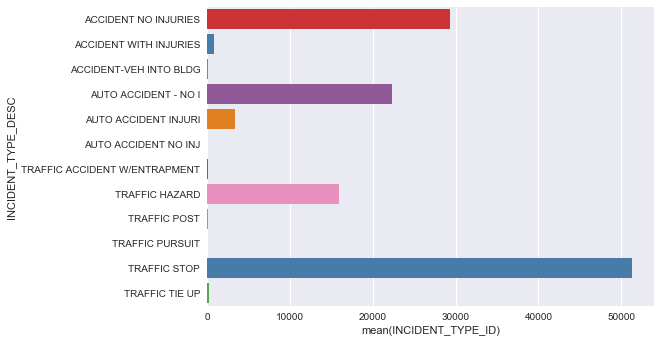

In [40]:
sns.barplot(y="INCIDENT_TYPE_DESC", x="INCIDENT_TYPE_ID", data=INCIDENT_TYPE_DESC,palette="Set1")

In [41]:
COMMUNITY_COUNCIL_NEIGHBORHOOD = PDI_PoliceData1.groupby(['COMMUNITY_COUNCIL_NEIGHBORHOOD']).count()
COMMUNITY_COUNCIL_NEIGHBORHOOD.reset_index()
COMMUNITY_COUNCIL_NEIGHBORHOOD['COMMUNITY_COUNCIL_NEIGHBORHOOD'] = COMMUNITY_COUNCIL_NEIGHBORHOOD.index
COMMUNITY_COUNCIL_NEIGHBORHOOD

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,PRIORITY,PRIORITY_COLOR,ARRIVAL_TIME_PRIMARY_UNIT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,BEAT,DISTRICT,COMMUNITY_COUNCIL_NEIGHBORHOOD
COMMUNITY_COUNCIL_NEIGHBORHOOD,,,,,,,,,,,,,,,,,,
AVONDALE,3899,3899,3899,3899,3899,3858,3899,3899,3899,0,3899,3242,3597,3833,3715,3892,3899,AVONDALE
AVONDALE - NORTH AVONDALE,747,747,747,747,747,740,747,747,747,0,747,604,675,738,694,744,747,AVONDALE - NORTH AVONDALE
BOND HILL,2025,2025,2025,2025,2025,1996,2025,2025,2025,0,2025,1758,1674,1985,1792,2021,2021,BOND HILL
CALIFORNIA,290,290,290,290,290,287,290,290,290,0,290,244,241,283,259,290,290,CALIFORNIA
CAMP WASHINGTON,1946,1946,1946,1946,1946,1920,1946,1946,1946,0,1946,1718,1625,1915,1718,1943,1946,CAMP WASHINGTON
CARTHAGE,835,835,835,835,835,825,835,835,835,0,835,679,708,821,757,833,835,CARTHAGE
CLIFTON,1377,1377,1377,1377,1377,1362,1377,1377,1377,0,1377,1071,1170,1358,1246,1372,1377,CLIFTON
CLIFTON - SPRING GROVE VILLAGE,94,94,94,94,94,92,94,94,94,0,94,94,69,91,74,94,94,CLIFTON - SPRING GROVE VILLAGE
COLLEGE HILL,1492,1492,1492,1492,1492,1474,1492,1492,1492,0,1492,1047,1236,1469,1316,1486,1492,COLLEGE HILL


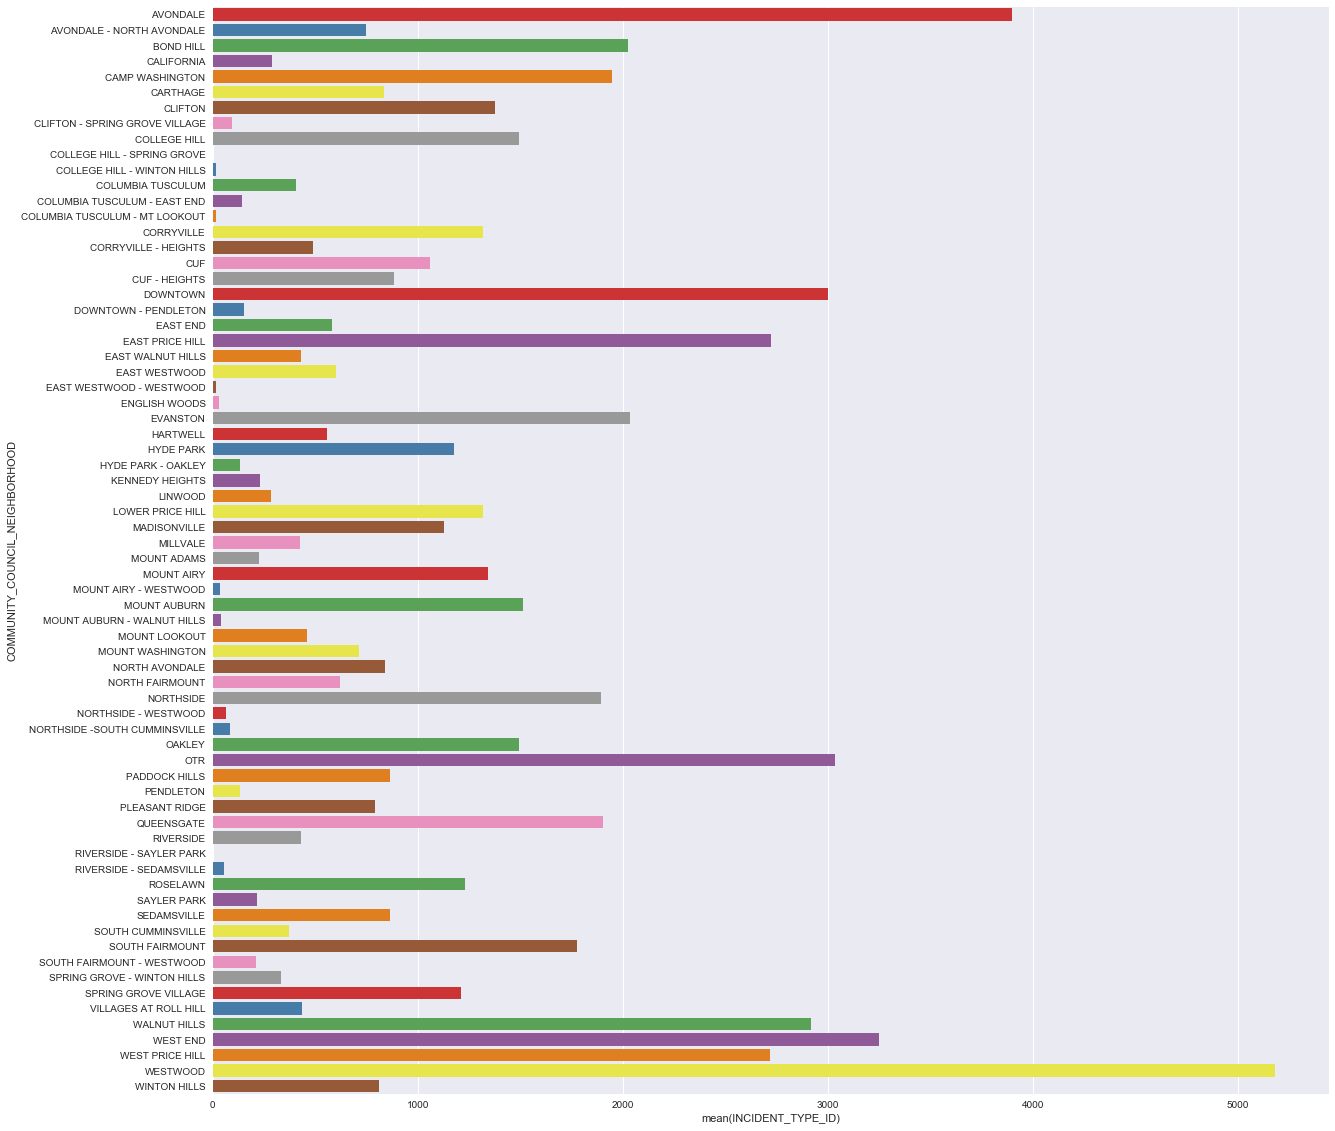

In [43]:
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(y="COMMUNITY_COUNCIL_NEIGHBORHOOD", x="INCIDENT_TYPE_ID", data=COMMUNITY_COUNCIL_NEIGHBORHOOD,palette="Set1")

<br>
<br>
<br>

# ******* ************************** ************** ********** ************ ******************#
# Closed Citizen Complaints dataset
# ******* ************************** ************** ********** ************ ******************#

<br>
<br>
<br>

In [3]:
Citizen_Complaint = pd.read_csv('../data/Citizen_Complaint_Authority__CCA__Closed_Cases.csv')

FileNotFoundError: File b'../data/Citizen_Complaint_Authority__CCA__Closed_Cases.csv' does not exist

In [45]:
Citizen_Complaint

,COMPLAINT_TYPE,CCA_CASE_NO,DATE_RECEIVED,HOW_RECEIVED,DISTRICT,NEIGHBORHOOD,ALLEGATION_CODE,DESCRIPTION,DISPOSITION_CODE,OFFICER_GENDER,OFFICER_RACE,COMPLAINANT_GENDER,COMPLAINANT_RACE,HOW_CLOSED
0,CCA,16238,11/16/2016,PHONE,4,WALNUT HILLS,67,POINTING OF A FIREARM,4,MALE,WHITE,FEMALE,BLACK,INVESTIGATED
1,CCA,16238,11/16/2016,PHONE,4,WALNUT HILLS,190,STOP,2,MALE,WHITE,FEMALE,BLACK,INVESTIGATED
2,CCA,17063,03/13/2017,ETS,3,EAST PRICE HILL,186,USE OF FORCE (CHOKING),1,MALE,WHITE,FEMALE,BLACK,INVESTIGATED
3,CCA,17020,01/10/2017,E-MAIL,O,OUTSIDE CITY LIMITS,154,IMPROPER ENTRY (RESIDENCE),1,MALE,BLACK,UNKNOWN,UNKNOWN,INVESTIGATED
4,CCA,16238,11/16/2016,PHONE,4,WALNUT HILLS,67,POINTING OF A FIREARM,4,MALE,BLACK,FEMALE,BLACK,INVESTIGATED
5,CCA,17008,01/09/2017,ETS,1,OVER-THE-RHINE,67,POINTING OF A FIREARM,2,MALE,WHITE,MALE,BLACK,INVESTIGATED
6,CCA,17011,01/10/2017,ETS,1,CBD,136,USE OF FORCE (TASER),2,MALE,WHITE,MALE,BLACK,INVESTIGATED
7,CCA,17020,01/10/2017,E-MAIL,O,OUTSIDE CITY LIMITS,154,IMPROPER ENTRY (RESIDENCE),1,MALE,WHITE,UNKNOWN,UNKNOWN,INVESTIGATED
8,CCA,17020,01/10/2017,E-MAIL,O,OUTSIDE CITY LIMITS,154,IMPROPER ENTRY (RESIDENCE),1,MALE,WHITE,UNKNOWN,UNKNOWN,INVESTIGATED
9,CCA,16244,12/02/2016,WALK-IN,1,OVER-THE-RHINE,184,STOP (PERSON),1,MALE,WHITE,MALE,BLACK,INVESTIGATED


In [46]:
DESCRIPTION = Citizen_Complaint.groupby(['DESCRIPTION']).count()
DESCRIPTION.reset_index()
DESCRIPTION['DESCRIPTION'] = DESCRIPTION.index
DESCRIPTION

,COMPLAINT_TYPE,CCA_CASE_NO,DATE_RECEIVED,HOW_RECEIVED,DISTRICT,NEIGHBORHOOD,ALLEGATION_CODE,DISPOSITION_CODE,OFFICER_GENDER,OFFICER_RACE,COMPLAINANT_GENDER,COMPLAINANT_RACE,HOW_CLOSED,DESCRIPTION
DESCRIPTION,,,,,,,,,,,,,,
ABUSE OF AUTHORITY (COERCION),1,1,1,1,1,1,1,1,1,1,1,1,1,ABUSE OF AUTHORITY (COERCION)
CANINE OPERATIONS (TRACK),2,2,2,2,2,2,2,2,2,2,2,2,2,CANINE OPERATIONS (TRACK)
DETENTION,11,11,11,11,11,11,11,11,11,11,11,11,11,DETENTION
DISCHARGE OF A FIREARM,24,24,24,24,24,24,24,24,24,24,24,24,24,DISCHARGE OF A FIREARM
DISCHARGE OF A FIREARM (FATAL),4,4,4,4,4,4,4,4,4,4,4,4,4,DISCHARGE OF A FIREARM (FATAL)
DISCOURTESY,82,82,82,82,82,82,82,82,82,82,82,82,82,DISCOURTESY
DISCOURTESY (PROFANITY),18,18,18,18,18,18,18,18,18,18,18,18,18,DISCOURTESY (PROFANITY)
DISCOURTESY (RACIAL),1,1,1,1,1,1,1,1,1,1,1,1,1,DISCOURTESY (RACIAL)
DISCOURTESY (SPITTLE),1,1,1,1,1,1,1,1,1,1,1,1,1,DISCOURTESY (SPITTLE)


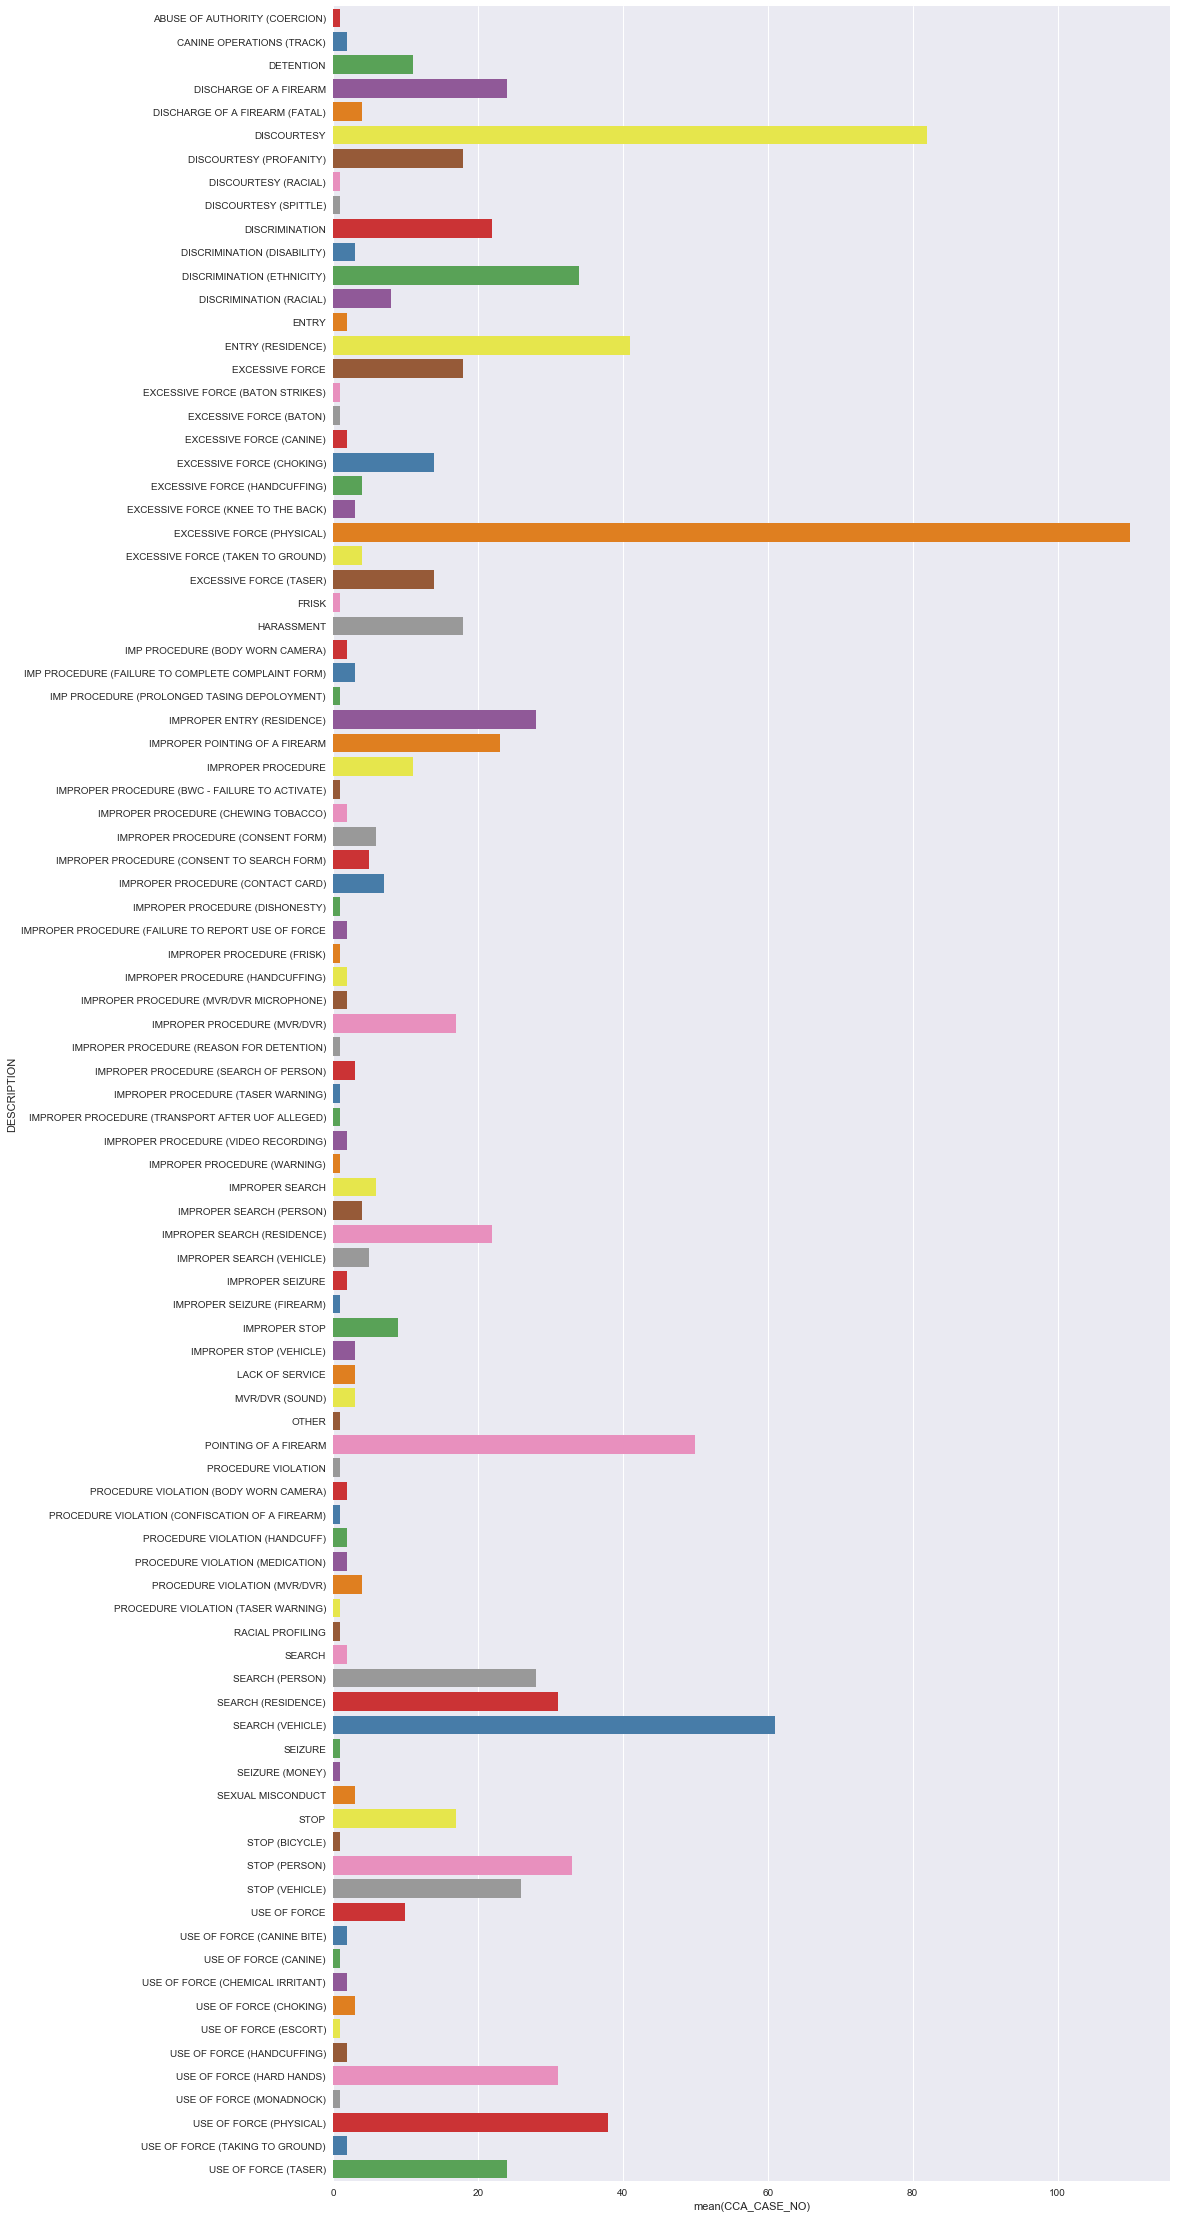

In [49]:
sns.set(rc={'figure.figsize':(15,40)})
sns.barplot(y="DESCRIPTION", x="CCA_CASE_NO", data=DESCRIPTION,palette="Set1")

<br>
<br>
<br>

# ******* ************************** ************** ********** ************ ******************#
# cincinnati_311_non_emergency_service_requests
# ******* ************************** ************** ********** ************ ******************#

<br>
<br>
<br>

In [76]:
c311_non_emergency = pd.read_csv('../data/cincinnati_311_non_emergency_service_requests_utf8.csv')

In [77]:
c311_non_emergency.shape

(659619, 19)

In [78]:
c311_non_emergency.set_index("SERVICE_REQUEST_ID")

,JURISDICTION_ID,STATUS,SERVICE_NAME,SERVICE_CODE,DESCRIPTION,AGENCY_RESPONSIBLE,SERVICE_NOTICE,REQUESTED_DATETIME,UPDATED_DATETIME,EXPECTED_DATETIME,ADDRESS,ADDRESS_ID,ZIPCODE,LATITUDE,LONGITUDE,REQUESTED_DATE,UPDATED_DATE,LAST_TABLE_UPDATE
SERVICE_REQUEST_ID,,,,,,,,,,,,,,,,,,
SR18080929,CINCINNATI,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,NaN,2018-08-26T13:51:00Z,2018-08-26T13:51:00Z,2018-08-27T00:00:00Z,"934 WINDSOR ST, CINC - GJ1694433382",NaN,45206.0,39.122614,-84.490458,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01
SR18080942,CINCINNATI,NEW,"Tires, Special Collection",TIRES,Request entered through the Web. Refer to Inta...,Public Services,NaN,2018-08-26T16:53:00Z,2018-08-26T16:53:00Z,2018-09-09T00:00:00Z,"3635 EDWARDS RD, CINC - GJ2095335838",NaN,NaN,39.143720,-84.443307,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01
SR18080928,CINCINNATI,NEW,"Water, leaks/breaks",WTRLKSBK,Request entered through the Web. Refer to Inta...,Cin Water Works,NaN,2018-08-26T13:49:00Z,2018-08-26T13:49:00Z,2018-09-09T00:00:00Z,"1517 BURDETTE CT, CINC -",NaN,45206.0,39.127544,-84.477770,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01
SR16100686,CINCINNATI,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,NaN,2016-12-04T09:03:00Z,2016-12-04T09:03:00Z,2016-12-05T00:00:00Z,"1544 WITTEKIND TER, CINC - GJ1195242537",NaN,45224.0,39.206269,-84.545276,12/4/2016 0:00,12/4/2016 0:00,12/4/2016 23:00
SR16100513,CINCINNATI,CLOS,"Trash cart, registration",TRSHCRTR,REQUESTING A STICKER,Public Services,NaN,2016-12-02T13:15:00Z,2017-04-05T00:00:00Z,2016-12-24T00:00:00Z,1225 SUNSET AV - GJ0879632336,NaN,45205.0,39.115188,-84.584961,12/2/2016 0:00,4/5/2017 0:00,4/5/2017 23:00
SR17026172,CINCINNATI,CLOS,"Yard waste,rtc",YDWSTA-J,Request entered through the Web. Refer to Inta...,Public Services,NaN,2017-04-04T09:23:00Z,2017-04-05T00:00:00Z,2017-04-11T00:00:00Z,"1049 KREIS LN, CINC - GJ0844332011",NaN,45205.0,39.112349,-84.589142,4/4/2017 0:00,4/5/2017 0:00,4/5/2017 23:00
SR18080947,CINCINNATI,NEW,"Tree, dead on priv prop stndrd",TREEPR,Request entered through the Web. Refer to Inta...,Cinc Building Dept,NaN,2018-08-26T17:54:00Z,2018-08-26T17:54:00Z,2018-11-24T00:00:00Z,"440 STANLEY AV, CINC - GJ2182932760",NaN,45226.0,39.115786,-84.434201,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01
SR15102936,CINCINNATI,CLOS,"Building, residential",BLD-RES,PE SURVEY FOR CIVIL LITIGATION PER THE LAW DEPT,Cinc Building Dept,NaN,2015-12-07T16:31:00Z,2016-12-05T00:00:00Z,2016-12-06T00:00:00Z,711 RIDGEWAY AV - GJ1653635079,NaN,45229.0,39.137987,-84.494638,12/7/2015 0:00,12/5/2016 0:00,12/5/2016 23:01
SR16100414,CINCINNATI,CLOS,"Metal Furniture, Spec Collectn",MTL-FRN,,Public Services,NaN,2016-12-02T08:57:00Z,2016-12-05T00:00:00Z,2016-12-16T00:00:00Z,4132 W 8TH ST - GJ0855231495,NaN,45205.0,39.107670,-84.588034,12/2/2016 0:00,12/5/2016 0:00,12/5/2016 23:01


In [79]:
df = c311_non_emergency[['AGENCY_RESPONSIBLE','SERVICE_REQUEST_ID']]

In [52]:
df.set_index("SERVICE_REQUEST_ID")

,AGENCY_RESPONSIBLE
SERVICE_REQUEST_ID,
SR18080929,Police Department
SR18080942,Public Services
SR18080928,Cin Water Works
SR16100686,Police Department
SR16100513,Public Services
SR17026172,Public Services
SR18080947,Cinc Building Dept
SR15102936,Cinc Building Dept
SR16100414,Public Services


In [80]:
c311_non_emergency.head()

,JURISDICTION_ID,SERVICE_REQUEST_ID,STATUS,SERVICE_NAME,SERVICE_CODE,DESCRIPTION,AGENCY_RESPONSIBLE,SERVICE_NOTICE,REQUESTED_DATETIME,UPDATED_DATETIME,EXPECTED_DATETIME,ADDRESS,ADDRESS_ID,ZIPCODE,LATITUDE,LONGITUDE,REQUESTED_DATE,UPDATED_DATE,LAST_TABLE_UPDATE
0,CINCINNATI,SR18080929,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,NaN,2018-08-26T13:51:00Z,2018-08-26T13:51:00Z,2018-08-27T00:00:00Z,"934 WINDSOR ST, CINC - GJ1694433382",NaN,45206.0,39.122614,-84.490458,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01
1,CINCINNATI,SR18080942,NEW,"Tires, Special Collection",TIRES,Request entered through the Web. Refer to Inta...,Public Services,NaN,2018-08-26T16:53:00Z,2018-08-26T16:53:00Z,2018-09-09T00:00:00Z,"3635 EDWARDS RD, CINC - GJ2095335838",NaN,NaN,39.143720,-84.443307,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01
2,CINCINNATI,SR18080928,NEW,"Water, leaks/breaks",WTRLKSBK,Request entered through the Web. Refer to Inta...,Cin Water Works,NaN,2018-08-26T13:49:00Z,2018-08-26T13:49:00Z,2018-09-09T00:00:00Z,"1517 BURDETTE CT, CINC -",NaN,45206.0,39.127544,-84.477770,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01
3,CINCINNATI,SR16100686,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,NaN,2016-12-04T09:03:00Z,2016-12-04T09:03:00Z,2016-12-05T00:00:00Z,"1544 WITTEKIND TER, CINC - GJ1195242537",NaN,45224.0,39.206269,-84.545276,12/4/2016 0:00,12/4/2016 0:00,12/4/2016 23:00
4,CINCINNATI,SR16100513,CLOS,"Trash cart, registration",TRSHCRTR,REQUESTING A STICKER,Public Services,NaN,2016-12-02T13:15:00Z,2017-04-05T00:00:00Z,2016-12-24T00:00:00Z,1225 SUNSET AV - GJ0879632336,NaN,45205.0,39.115188,-84.584961,12/2/2016 0:00,4/5/2017 0:00,4/5/2017 23:00


In [81]:
c311_non_emergency.columns

Index(['JURISDICTION_ID', 'SERVICE_REQUEST_ID', 'STATUS', 'SERVICE_NAME',
       'SERVICE_CODE', 'DESCRIPTION', 'AGENCY_RESPONSIBLE', 'SERVICE_NOTICE',
       'REQUESTED_DATETIME', 'UPDATED_DATETIME', 'EXPECTED_DATETIME',
       'ADDRESS', 'ADDRESS_ID', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'REQUESTED_DATE', 'UPDATED_DATE', 'LAST_TABLE_UPDATE'],
      dtype='object')

In [82]:
print("\n ********************************** Summary of dataset *******************************************************")
print("\n1. Total number of records: ",c311_non_emergency.shape[0])
print("\n2. Total number of columns: ",c311_non_emergency.shape[1])
print("\n3. Column Names : ",c311_non_emergency.columns)
print("\n4. Are there any duplicate records?", c311_non_emergency.duplicated().any())
print("\n******* Numerical attributes and their range *******")
c311_non_emergency.describe().T


 ********************************** Summary of dataset *******************************************************

1. Total number of records:  659619

2. Total number of columns:  19

3. Column Names :  Index(['JURISDICTION_ID', 'SERVICE_REQUEST_ID', 'STATUS', 'SERVICE_NAME',
       'SERVICE_CODE', 'DESCRIPTION', 'AGENCY_RESPONSIBLE', 'SERVICE_NOTICE',
       'REQUESTED_DATETIME', 'UPDATED_DATETIME', 'EXPECTED_DATETIME',
       'ADDRESS', 'ADDRESS_ID', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'REQUESTED_DATE', 'UPDATED_DATE', 'LAST_TABLE_UPDATE'],
      dtype='object')

4. Are there any duplicate records? False

******* Numerical attributes and their range *******


,count,mean,std,min,25%,50%,75%,max
SERVICE_NOTICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS_ID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,659471.0,45217.794120,11.316576,45001.000000,45207.000000,45216.000000,45227.000000,45255.000000
LATITUDE,659619.0,39.141880,0.030804,39.040820,39.118339,39.137886,39.160177,39.304038
LONGITUDE,659619.0,-84.511792,0.063477,-84.819167,-84.561852,-84.516643,-84.467355,-84.264106


In [83]:
col_names = c311_non_emergency.columns
for col in col_names:
    print("Column Name: ",col)
    print(c311_non_emergency[col].head())

Column Name:  JURISDICTION_ID
0    CINCINNATI
1    CINCINNATI
2    CINCINNATI
3    CINCINNATI
4    CINCINNATI
Name: JURISDICTION_ID, dtype: object
Column Name:  SERVICE_REQUEST_ID
0    SR18080929
1    SR18080942
2    SR18080928
3    SR16100686
4    SR16100513
Name: SERVICE_REQUEST_ID, dtype: object
Column Name:  STATUS
0     NEW
1     NEW
2     NEW
3     NEW
4    CLOS
Name: STATUS, dtype: object
Column Name:  SERVICE_NAME
0    Default, police (and junk veh)
1         Tires, Special Collection
2               Water, leaks/breaks
3    Default, police (and junk veh)
4          Trash cart, registration
Name: SERVICE_NAME, dtype: object
Column Name:  SERVICE_CODE
0     DFLTPLC
1       TIRES
2    WTRLKSBK
3     DFLTPLC
4    TRSHCRTR
Name: SERVICE_CODE, dtype: object
Column Name:  DESCRIPTION
0    Request entered through the Web. Refer to Inta...
1    Request entered through the Web. Refer to Inta...
2    Request entered through the Web. Refer to Inta...
3    Request entered through the Web. 

In [84]:
for col in col_names:
    print("#Missing values out of ",c311_non_emergency.shape[0]," for ",col,": ",c311_non_emergency[col].isnull().sum())

#Missing values out of  659619  for  JURISDICTION_ID :  0
#Missing values out of  659619  for  SERVICE_REQUEST_ID :  0
#Missing values out of  659619  for  STATUS :  0
#Missing values out of  659619  for  SERVICE_NAME :  1
#Missing values out of  659619  for  SERVICE_CODE :  1
#Missing values out of  659619  for  DESCRIPTION :  203
#Missing values out of  659619  for  AGENCY_RESPONSIBLE :  0
#Missing values out of  659619  for  SERVICE_NOTICE :  659619
#Missing values out of  659619  for  REQUESTED_DATETIME :  0
#Missing values out of  659619  for  UPDATED_DATETIME :  342
#Missing values out of  659619  for  EXPECTED_DATETIME :  0
#Missing values out of  659619  for  ADDRESS :  11
#Missing values out of  659619  for  ADDRESS_ID :  659619
#Missing values out of  659619  for  ZIPCODE :  148
#Missing values out of  659619  for  LATITUDE :  0
#Missing values out of  659619  for  LONGITUDE :  0
#Missing values out of  659619  for  REQUESTED_DATE :  0
#Missing values out of  659619  for  UPD

In [27]:
categorical_cols = c311_non_emergency.select_dtypes(include=['object']).columns
categorical_cols

Index(['JURISDICTION_ID', 'SERVICE_REQUEST_ID', 'STATUS', 'SERVICE_NAME',
       'SERVICE_CODE', 'DESCRIPTION', 'AGENCY_RESPONSIBLE',
       'REQUESTED_DATETIME', 'UPDATED_DATETIME', 'EXPECTED_DATETIME',
       'ADDRESS', 'REQUESTED_DATE', 'UPDATED_DATE', 'LAST_TABLE_UPDATE'],
      dtype='object')

In [28]:
for col in categorical_cols:
    #print("Unique values for the column ",col,"\n:",c311_non_emergency[col].unique())
    print("Count of Unique values for the column",col,len(c311_non_emergency[col].unique()))
    

Count of Unique values for the column JURISDICTION_ID 1
Count of Unique values for the column SERVICE_REQUEST_ID 659619
Count of Unique values for the column STATUS 4
Count of Unique values for the column SERVICE_NAME 642
Count of Unique values for the column SERVICE_CODE 624
Count of Unique values for the column DESCRIPTION 256277
Count of Unique values for the column AGENCY_RESPONSIBLE 18
Count of Unique values for the column REQUESTED_DATETIME 506705
Count of Unique values for the column UPDATED_DATETIME 41660
Count of Unique values for the column EXPECTED_DATETIME 4612
Count of Unique values for the column ADDRESS 195510
Count of Unique values for the column REQUESTED_DATE 2454
Count of Unique values for the column UPDATED_DATE 2327
Count of Unique values for the column LAST_TABLE_UPDATE 1390


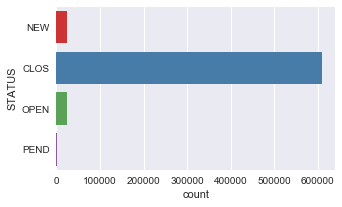

In [30]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(y='STATUS',data=c311_non_emergency,palette='Set1')
plt.show()

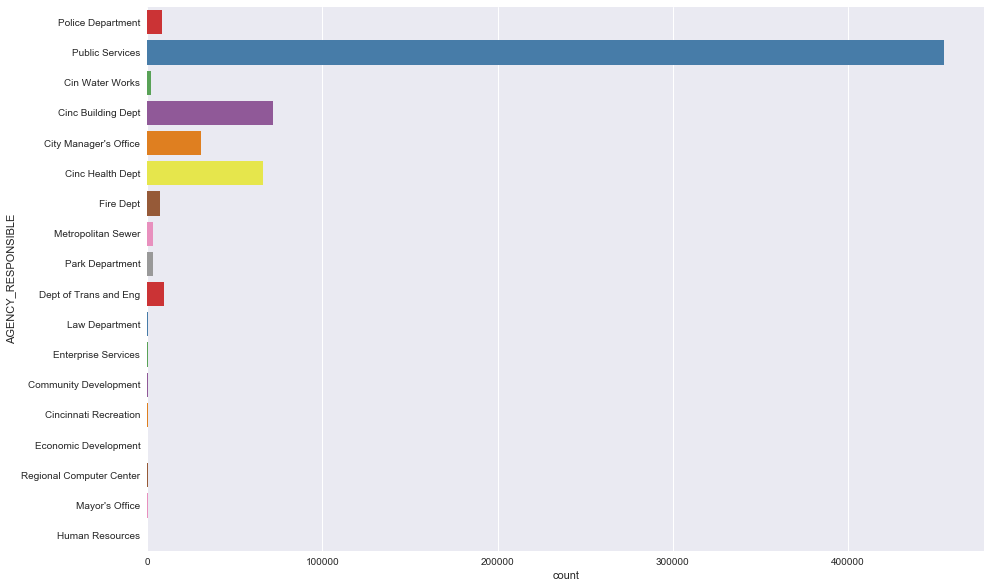

In [34]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(y='AGENCY_RESPONSIBLE',data=c311_non_emergency,palette='Set1')
plt.show()

In [38]:
df['SERVICE_NAME'].unique()

array(['Tires, Special Collection', 'Trash cart, registration',
       'Yard waste,rtc', 'Metal Furniture, Spec Collectn',
       'Pothole, repair', 'Tall grass/weeds, private prop',
       'Trash, request for collection', 'Sign, down/missing ',
       'Dumping, prv prop <2500 sq ft', 'Corner can, dmg/liner/other',
       'Special collections, rtc', 'Trash, tagged collections',
       'Sign, down/missing', 'Street cleaning',
       'Litter, private property', 'Trash, improper set out',
       'Yard waste, tagged collections', 'Graffiti, removal',
       'Sign, down/missing stop sign', 'Sign, street sign faded',
       'Signal, traf/ped/school repair', 'Dead animal', 'Light, repair',
       'Trash, empty cans left out', 'Street sweeping',
       'Yard waste, late set out', 'City facility, repair',
       'Trash, no trash at location', 'Trash, late set out ',
       'Trash, can damaged', 'Carpentry, door issue(s)',
       'General repair, street', 'Service complaint, trash',
       'HVAC

In [37]:
df.shape

(455231, 19)

In [56]:
#c311_non_emergency = pd.get_dummies(c311_non_emergency, prefix=['Agency'], columns=['AGENCY_RESPONSIBLE'])

In [85]:
del c311_non_emergency['JURISDICTION_ID']
del c311_non_emergency['SERVICE_NOTICE']

In [86]:
del c311_non_emergency['UPDATED_DATETIME']
del c311_non_emergency['EXPECTED_DATETIME']

In [89]:
del c311_non_emergency['ADDRESS_ID']

In [72]:
#c311_non_emergency['address_line_11'] = c311_non_emergency[c311_non_emergency['Add_code'].isnull()].ADDRESS.str.split('-').str[0]
#c311_non_emergency['Add_code1'] = c311_non_emergency[c311_non_emergency['Add_code'].isnull()].ADDRESS.str.split('-').str[1]

In [87]:
c311_non_emergency['year_of_issue'] = c311_non_emergency.REQUESTED_DATETIME.str.split('-').str[0]

In [90]:
c311_non_emergency.head(20)

,SERVICE_REQUEST_ID,STATUS,SERVICE_NAME,SERVICE_CODE,DESCRIPTION,AGENCY_RESPONSIBLE,REQUESTED_DATETIME,ADDRESS,ZIPCODE,LATITUDE,LONGITUDE,REQUESTED_DATE,UPDATED_DATE,LAST_TABLE_UPDATE,year_of_issue
0,SR18080929,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2018-08-26T13:51:00Z,"934 WINDSOR ST, CINC - GJ1694433382",45206.0,39.122614,-84.490458,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01,2018
1,SR18080942,NEW,"Tires, Special Collection",TIRES,Request entered through the Web. Refer to Inta...,Public Services,2018-08-26T16:53:00Z,"3635 EDWARDS RD, CINC - GJ2095335838",NaN,39.143720,-84.443307,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01,2018
2,SR18080928,NEW,"Water, leaks/breaks",WTRLKSBK,Request entered through the Web. Refer to Inta...,Cin Water Works,2018-08-26T13:49:00Z,"1517 BURDETTE CT, CINC -",45206.0,39.127544,-84.477770,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01,2018
3,SR16100686,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2016-12-04T09:03:00Z,"1544 WITTEKIND TER, CINC - GJ1195242537",45224.0,39.206269,-84.545276,12/4/2016 0:00,12/4/2016 0:00,12/4/2016 23:00,2016
4,SR16100513,CLOS,"Trash cart, registration",TRSHCRTR,REQUESTING A STICKER,Public Services,2016-12-02T13:15:00Z,1225 SUNSET AV - GJ0879632336,45205.0,39.115188,-84.584961,12/2/2016 0:00,4/5/2017 0:00,4/5/2017 23:00,2016
5,SR17026172,CLOS,"Yard waste,rtc",YDWSTA-J,Request entered through the Web. Refer to Inta...,Public Services,2017-04-04T09:23:00Z,"1049 KREIS LN, CINC - GJ0844332011",45205.0,39.112349,-84.589142,4/4/2017 0:00,4/5/2017 0:00,4/5/2017 23:00,2017
6,SR18080947,NEW,"Tree, dead on priv prop stndrd",TREEPR,Request entered through the Web. Refer to Inta...,Cinc Building Dept,2018-08-26T17:54:00Z,"440 STANLEY AV, CINC - GJ2182932760",45226.0,39.115786,-84.434201,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01,2018
7,SR15102936,CLOS,"Building, residential",BLD-RES,PE SURVEY FOR CIVIL LITIGATION PER THE LAW DEPT,Cinc Building Dept,2015-12-07T16:31:00Z,711 RIDGEWAY AV - GJ1653635079,45229.0,39.137987,-84.494638,12/7/2015 0:00,12/5/2016 0:00,12/5/2016 23:01,2015
8,SR16100414,CLOS,"Metal Furniture, Spec Collectn",MTL-FRN,,Public Services,2016-12-02T08:57:00Z,4132 W 8TH ST - GJ0855231495,45205.0,39.107670,-84.588034,12/2/2016 0:00,12/5/2016 0:00,12/5/2016 23:01,2016
9,SR16100750,CLOS,"Pothole, repair",PTHOLE,PER 537- FILLED 4 POTHOLES- ADDRESS GIVEN 5555...,Public Services,2016-12-05T02:38:00Z,5541 DAVIES PL - GJ2484638299,45227.0,39.164872,-84.397505,12/5/2016 0:00,12/5/2016 0:00,12/5/2016 23:00,2016


In [109]:
c311_non_emergency.to_csv('C:/Users/Preeti/Github/CapstoneProject/data/c311_non_emergency_clean.csv', index = False)


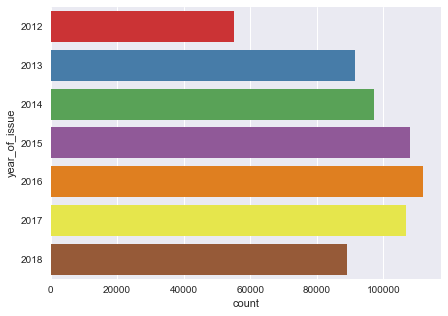

In [93]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(y='year_of_issue',data=c311_non_emergency,palette='Set1')
plt.show()

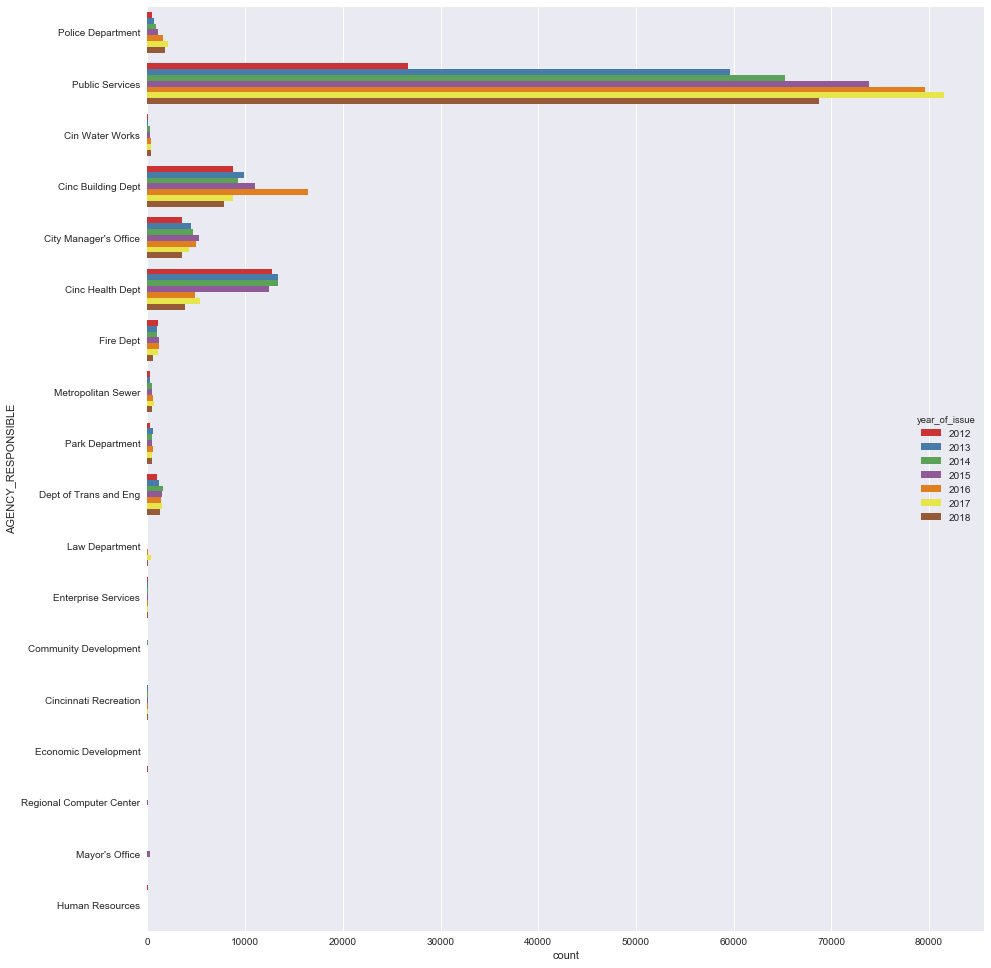

In [97]:
sns.set(rc={'figure.figsize':(15,17)})
sns.countplot(y='AGENCY_RESPONSIBLE',data=c311_non_emergency,hue = 'year_of_issue',palette='Set1')
plt.show()

In [98]:
c311_non_emergency['AGENCY_RESPONSIBLE'].unique()

array(['Police Department', 'Public Services', 'Cin Water Works',
       'Cinc Building Dept', "City Manager's Office", 'Cinc Health Dept',
       'Fire Dept', 'Metropolitan Sewer', 'Park Department',
       'Dept of Trans and Eng', 'Law Department', 'Enterprise Services',
       'Community Development', 'Cincinnati Recreation',
       'Economic Development', 'Regional Computer Center',
       "Mayor's Office", 'Human Resources'], dtype=object)

In [107]:
c311_non_emergency[c311_non_emergency['AGENCY_RESPONSIBLE'] == ('Police Department')]


,SERVICE_REQUEST_ID,STATUS,SERVICE_NAME,SERVICE_CODE,DESCRIPTION,AGENCY_RESPONSIBLE,REQUESTED_DATETIME,ADDRESS,ZIPCODE,LATITUDE,LONGITUDE,REQUESTED_DATE,UPDATED_DATE,LAST_TABLE_UPDATE,year_of_issue
0,SR18080929,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2018-08-26T13:51:00Z,"934 WINDSOR ST, CINC - GJ1694433382",45206.0,39.122614,-84.490458,8/26/2018 0:00,8/26/2018 0:00,8/26/2018 23:01,2018
3,SR16100686,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2016-12-04T09:03:00Z,"1544 WITTEKIND TER, CINC - GJ1195242537",45224.0,39.206269,-84.545276,12/4/2016 0:00,12/4/2016 0:00,12/4/2016 23:00,2016
49,SR18080731,CLOS,"Default, police (and junk veh)",DFLTPLC,BLOCKING RESIDENT'S DRVIEWAY *** BLUE MINI VAN...,Police Department,2018-08-24T14:47:00Z,1217 BLANCHARD AV - GJ1042732270,45205.0,39.114201,-84.566134,8/24/2018 0:00,8/27/2018 0:00,8/27/2018 23:01,2018
99,SR16099025,CLOS,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2016-11-28T10:56:00Z,"1116 RUTLEDGE AV, CINC - GJ0860532035",45205.0,39.112529,-84.587258,11/28/2016 0:00,12/5/2016 0:00,12/5/2016 23:01,2016
126,SR16085074,CLOS,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2016-10-03T13:10:00Z,"1121 WAREHAM DR, CINC - GJ1630131884",45202.0,39.109290,-84.498372,10/3/2016 0:00,12/5/2016 0:00,12/5/2016 23:01,2016
131,SR18080995,CLOS,"Default, police (and junk veh)",DFLTPLC,WHITE FORD VAN ON STREET FOR 2 WEEKS OH TAG# ...,Police Department,2018-08-27T07:56:00Z,1644 MEARS AV - GJ2605229332,45230.0,39.083833,-84.386550,8/27/2018 0:00,8/27/2018 0:00,8/27/2018 23:01,2018
149,SR16100038,PEND,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2016-12-01T08:15:00Z,"514 DANDRIDGE ST, CINC - GJ1559332107",45202.0,39.111470,-84.506471,12/1/2016 0:00,12/5/2016 0:00,12/5/2016 23:01,2016
204,SR18061316,CLOS,"Default, police (and junk veh)",DFLTPLC,"abandon car sitting over 2 weeks, gray, lic...",Police Department,2018-06-28T10:08:00Z,2089 N TERALTA CIR - GJ1020734863,45211.0,39.137597,-84.567873,6/28/2018 0:00,8/27/2018 0:00,8/27/2018 23:01,2018
301,SR18080055,CLOS,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2018-08-22T18:20:00Z,"3709 LACLEDE AV, CINC - GJ0982432082",45205.0,39.112659,-84.573153,8/22/2018 0:00,8/27/2018 0:00,8/27/2018 23:01,2018
355,SR16100870,NEW,"Default, police (and junk veh)",DFLTPLC,Request entered through the Web. Refer to Inta...,Police Department,2016-12-05T10:14:00Z,"6086 DRYDEN AV, CINC - GJ2285340308",45213.0,39.183475,-84.419882,12/5/2016 0:00,12/5/2016 0:00,12/5/2016 23:00,2016


In [110]:
df = pd.read_csv('../data/311_non_emergency_data_reduced.csv')

In [111]:
df.columns

Index(['SERVICE_REQUEST_ID', 'STATUS', 'Issue category', 'AGENCY_RESPONSIBLE',
       'LATITUDE', 'LONGITUDE', 'year_of_issue'],
      dtype='object')

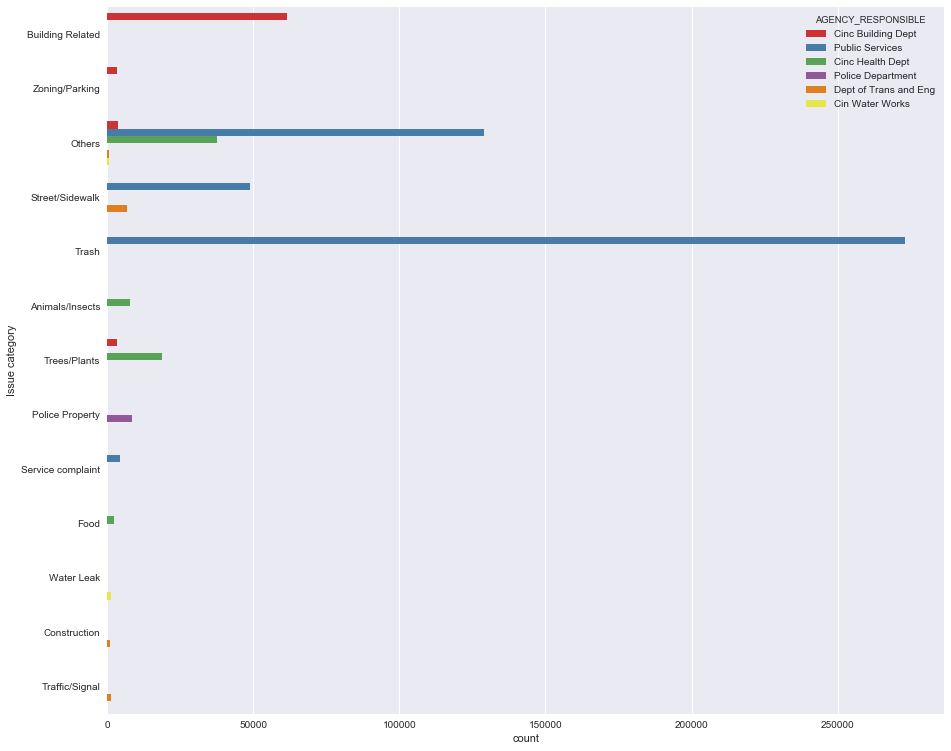

In [114]:
sns.set(rc={'figure.figsize':(15,13)})
sns.countplot(y='Issue category',data=df,hue='AGENCY_RESPONSIBLE',palette='Set1')
plt.show()